# importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
from pydataset import data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

# Exploratory data analysis 

In [2]:
df=data('DoctorAUS')
df

,sex,age,income,insurance,illness,actdays,hscore,chcond,doctorco,nondocco,hospadmi,hospdays,medecine,prescrib,nonpresc
1,1,0.19,0.55,levyplus,1,4,1,np,1,0,0,0,1,1,0
2,1,0.19,0.45,levyplus,1,2,1,np,1,0,0,0,2,1,1
3,0,0.19,0.90,medlevy,3,0,0,np,1,0,1,4,2,1,1
4,0,0.19,0.15,medlevy,1,0,0,np,1,0,0,0,0,0,0
5,0,0.19,0.45,medlevy,2,5,1,la,1,0,0,0,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5186,1,0.22,0.55,medlevy,0,0,0,np,0,0,0,0,0,0,0
5187,0,0.27,1.30,medlevy,0,0,1,np,0,0,0,0,3,0,3
5188,1,0.37,0.25,freerepa,1,0,1,np,0,0,0,0,0,0,0
5189,1,0.52,0.65,medlevy,0,0,0,np,0,0,0,0,0,0,0


cross-section from 1977--1978 number of observations : 5190 observation : individuals country : Australia : 15 variables ((2 discretised variables, 9 count variables, 1 ordinal variable, 3 factors))

A dataframe containing :

sex: factor w/ 2 levels: Male, Female

*age factor w/ 12 levels: 19,22,27...

*income annual income in tens of thousands of dollars,Factor w/ 14 levels:0,0.1,0.6...

*insurance insurance contract, factor w/ 4 levels: medlevy = Medicare => Univeral, levyplus = private health insurance => Priveate, freepoor = government insurance due to low income => govPoor, freerepa = government insurance due to old age disability or veteran status => govVA

*illness number of illness in past 2 weeks, numberic

*actdays number of days of reduced activity in past 2 weeks due to illness or injury, numeric

*hscore general health score using Goldberg's method (from 0 to 12), numeric

*chcond chronic condition, factor w/ 3 levels: np = no problem:2, la = limiting activity:0, nla:1 = not limiting activity)

*doctorco number of consultations with a doctor or specialist in the past 2 weeks, numeric

*nondocco number of consultations with non-doctor health professionals (chemist, optician, physiotherapist, social worker, district community nurse, chiropodist or chiropractor) in the past 2 weeks, numeric

*hospadmi number of admissions to a hospital, psychiatric hospital, nursing or convalescent home in the past 12 months (up to 5 or more admissions which is coded as 5)

*hospdays number of nights in a hospital, etc. during most recent admission: taken, where appropriate, as the mid-point of the intervals 1, 2, 3, 4, 5, 6, 7, 8-14, 15-30, 31-60, 61-79 with 80 or more admissions coded as 80. If no admission in past 12 months then equals zero. Numeric.

*medecine total number of prescribed and nonprescribed medications used in past 2 days. numeric.

*prescrib total number of prescribed medications used in past 2 days, numeric.

*nonpresc total number of nonprescribed medications used in past 2 days, numeric

In [3]:
df.insurance.unique()

array(['levyplus', 'medlevy', 'freerepa', 'freepor'], dtype=object)

In [4]:
df.columns


Index(['sex', 'age', 'income', 'insurance', 'illness', 'actdays', 'hscore',
       'chcond', 'doctorco', 'nondocco', 'hospadmi', 'hospdays', 'medecine',
       'prescrib', 'nonpresc'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5190 entries, 1 to 5190
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        5190 non-null   int64  
 1   age        5190 non-null   float64
 2   income     5190 non-null   float64
 3   insurance  5190 non-null   object 
 4   illness    5190 non-null   int64  
 5   actdays    5190 non-null   int64  
 6   hscore     5190 non-null   int64  
 7   chcond     5190 non-null   object 
 8   doctorco   5190 non-null   int64  
 9   nondocco   5190 non-null   int64  
 10  hospadmi   5190 non-null   int64  
 11  hospdays   5190 non-null   int64  
 12  medecine   5190 non-null   int64  
 13  prescrib   5190 non-null   int64  
 14  nonpresc   5190 non-null   int64  
dtypes: float64(2), int64(11), object(2)
memory usage: 648.8+ KB


In [6]:
df.describe()

,sex,age,income,illness,actdays,hscore,doctorco,nondocco,hospadmi,hospdays,medecine,prescrib,nonpresc
count,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000
mean,0.520617,0.406385,0.583160,1.431985,0.861850,1.217534,0.301734,0.214644,0.173603,1.333719,1.218304,0.862620,0.355684
std,0.499623,0.204782,0.368907,1.384152,2.887628,2.124266,0.798134,0.965276,0.507524,6.120081,1.556643,1.415375,0.712389
min,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.220000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.320000,0.550000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.620000,0.900000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000
max,1.000000,0.720000,1.500000,5.000000,14.000000,12.000000,9.000000,11.000000,5.000000,80.000000,8.000000,8.000000,8.000000


In [7]:
df.insurance.value_counts()

levyplus    2298
medlevy     1579
freerepa    1091
freepor      222
Name: insurance, dtype: int64

In [8]:
df.isna().sum()

sex          0
age          0
income       0
insurance    0
illness      0
actdays      0
hscore       0
chcond       0
doctorco     0
nondocco     0
hospadmi     0
hospdays     0
medecine     0
prescrib     0
nonpresc     0
dtype: int64

In [9]:
df.dtypes

sex            int64
age          float64
income       float64
insurance     object
illness        int64
actdays        int64
hscore         int64
chcond        object
doctorco       int64
nondocco       int64
hospadmi       int64
hospdays       int64
medecine       int64
prescrib       int64
nonpresc       int64
dtype: object

In [10]:
df['insurance'].unique()

array(['levyplus', 'medlevy', 'freerepa', 'freepor'], dtype=object)

Summary of Variables:

1. There are 13 numerical variables and 2 non-numerical variables in the dataset.

2. Out of the 15 variables, 14 are feature variables, and the variable 'insurance' is the target variable.

3. No missing values (NA) were found in the dataset.


In [11]:
data=df.copy()

# data preprocessing :

In [12]:
#make chcond/insurance categorical
df['chcond'].unique()

array(['np', 'la', 'nla'], dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
for col in df:
    if df[col].dtypes=='object':
        df[col]=le.fit_transform(df[col])

In [14]:
df['insurance'].unique()

array([2, 3, 1, 0])

In [15]:
df.head()

,sex,age,income,insurance,illness,actdays,hscore,chcond,doctorco,nondocco,hospadmi,hospdays,medecine,prescrib,nonpresc
1,1,0.19,0.55,2,1,4,1,2,1,0,0,0,1,1,0
2,1,0.19,0.45,2,1,2,1,2,1,0,0,0,2,1,1
3,0,0.19,0.90,3,3,0,0,2,1,0,1,4,2,1,1
4,0,0.19,0.15,3,1,0,0,2,1,0,0,0,0,0,0
5,0,0.19,0.45,3,2,5,1,0,1,0,0,0,3,1,2


#  Data Visualization

# Univariate plots:

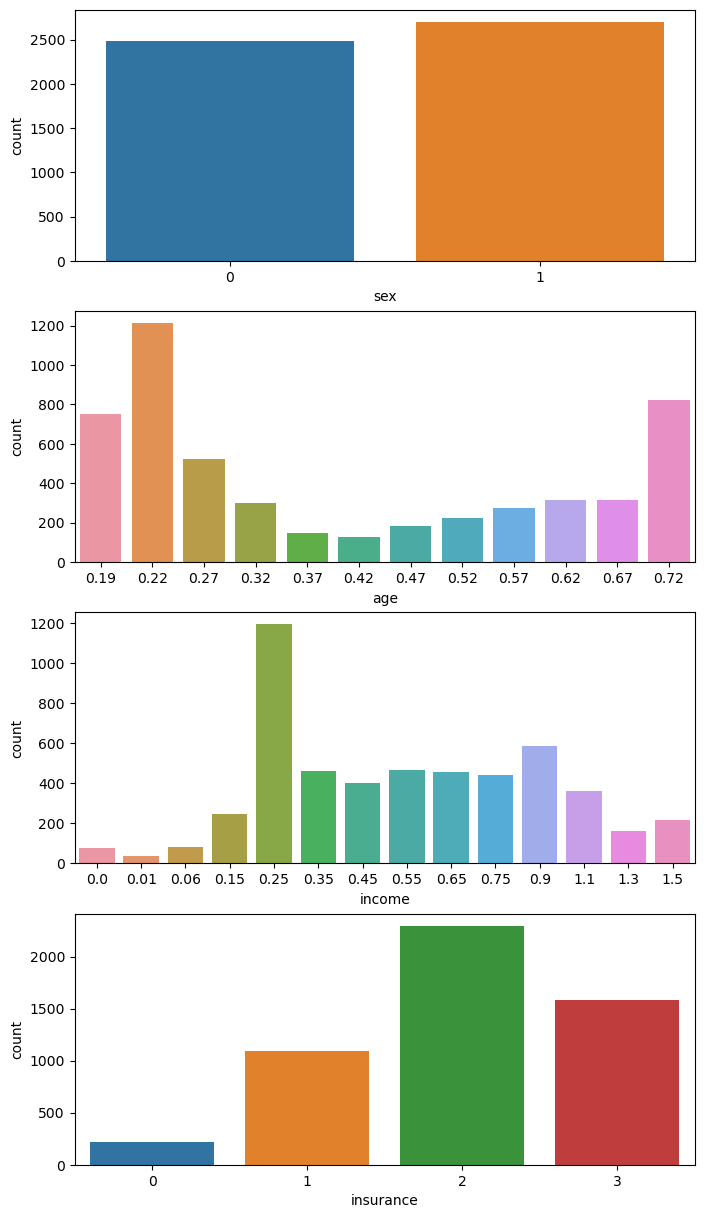

In [16]:
fig,ax=plt.subplots(4,1,figsize=(8,15))
sns.countplot(x='sex', data=df, ax=ax[0])
sns.countplot(x='age', data=df,  ax=ax[1])
sns.countplot(x='income', data=df, ax=ax[2],dodge=True)
sns.countplot(x='insurance', data=df,  ax=ax[3])
plt.show()

In this study, there is a higher representation of females compared to males. Additionally, an observation reveals a U-shaped distribution in the age demographic, suggesting the presence of two distinct age groups—a younger cohort and an older cohort.
ialso ,this younger group dominates the dataset. Moreover, it is noteworthy that more than half of the participants possess insurance, with a majority falling under Level 2 (levyplus). This prevalence of Level 2 insurance can be attributed to the correlation with middle income levels. Following closely is Level 3, while Levels 0 and 1 exhibit a relatively lower prevalence."

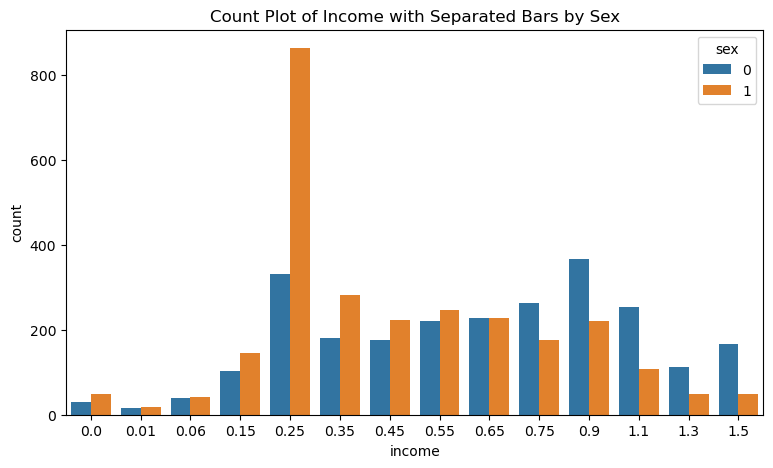

In [17]:
plt.figure(figsize=(9, 5))
sns.countplot(x='income', hue='sex', data=df, dodge=True)
plt.title('Count Plot of Income with Separated Bars by Sex')
plt.show()

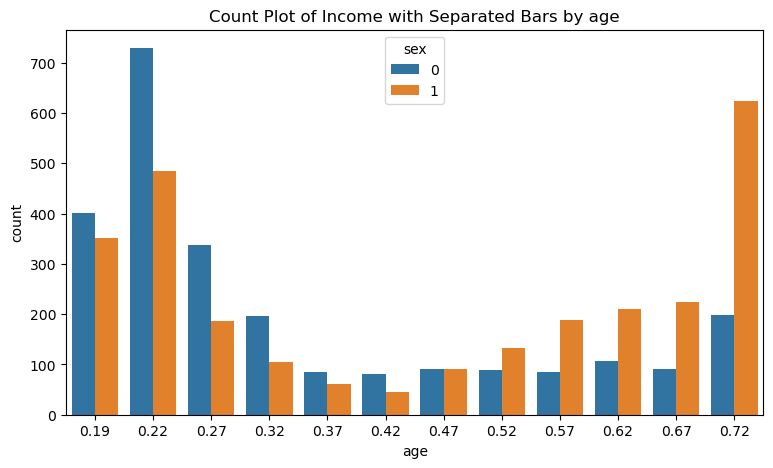

In [18]:
plt.figure(figsize=(9, 5))
sns.countplot(x='age', hue='sex', data=df, dodge=True)
plt.title('Count Plot of Income with Separated Bars by age')
plt.show()

In this study, there is a higher representation of older women compared to younger men. Additionally, a large proportion of females have incomes in the range of 2001 to 3000 AUD. Conversely, there are more males than females with higher incomes. Specifically, the mode for male income falls within the range of 8,000 to 10,000 AUD.

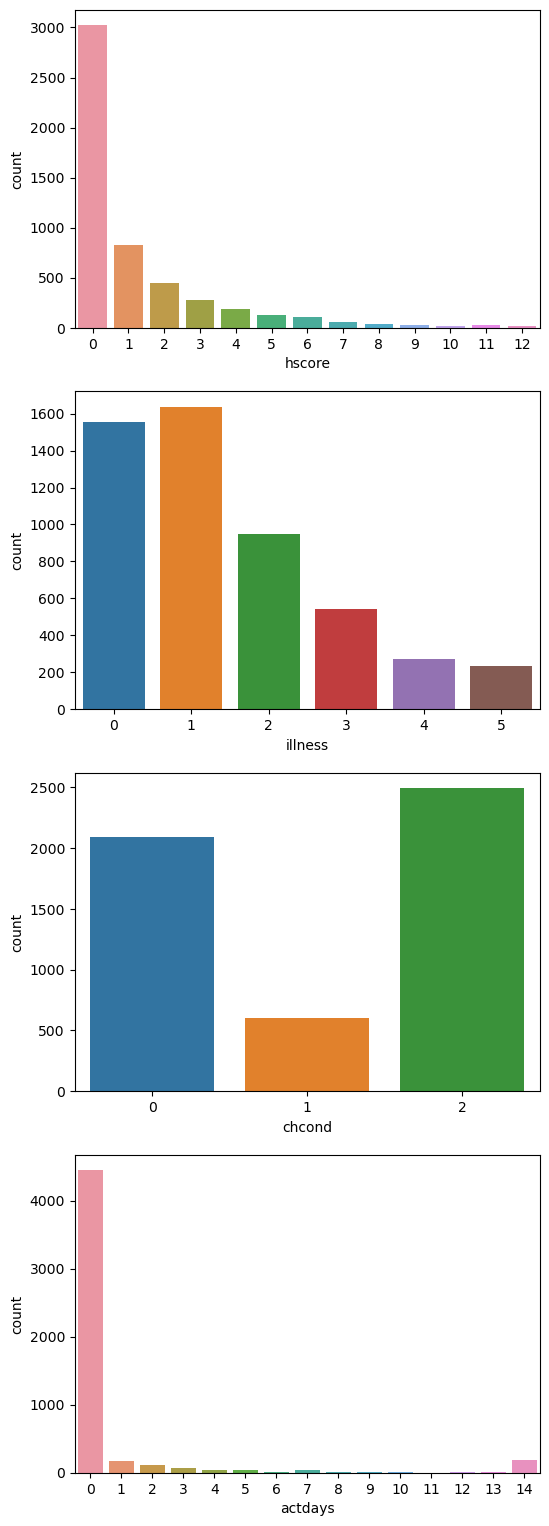

In [19]:
fig,ax=plt.subplots(4,1,figsize=(6,19))
sns.countplot(x='illness', data=df,  ax=ax[1])
sns.countplot(x='actdays', data=df,  ax=ax[3])
sns.countplot(x='hscore', data=df, ax=ax[0])
sns.countplot(x='chcond', data=df, ax=ax[2],dodge=True)
plt.show()

A predominant portion of the survey respondents either experience a chronic condition that restricts their activity (la) or are free from chronic issues (np). Less than 10% of the participants report having a chronic condition that doesn't limit their activity (nla).

A substantial 58% of survey participants indicate overall good health. Interestingly, a majority of them also disclose having one or more illnesses in the preceding two weeks.

While the overwhelming majority of participants have not faced any days of reduced activity due to illness or injury in the recent two weeks, a few did experience a continuous reduction in activity throughout the entire period.

# Multivariate plots

In [20]:
correlation = df.corr()

Our target variable is insurance. So, we should check how each attribute correlates with the insurance variable. We can do it as follows:

In [21]:
correlation['insurance'].sort_values(ascending=False)

insurance    1.000000
income       0.348044
chcond       0.182505
nonpresc     0.030825
actdays     -0.059638
hospadmi    -0.064954
doctorco    -0.072108
hscore      -0.079278
hospdays    -0.087912
nondocco    -0.088356
illness     -0.151840
sex         -0.221696
medecine    -0.223319
prescrib    -0.261123
age         -0.442606
Name: insurance, dtype: float64

# Interpretation
-The correlation coefficient ranges from -1 to +1.
-When it is close to +1, this signifies that there is a strong positive correlation. 
-When it is clsoe to -1, it means that there is a strong negative correlation So, we can see that there is a strong negative correlation between insurance and income
-When it is close to 0, it means that there is no correlation.

We can see that all the variables are positively correlated with insurance variable. Some variables are strongly positive correlated while some variables are negatively correlated.



<AxesSubplot:title={'center':'Correlation of Attributes with insurance variable'}>

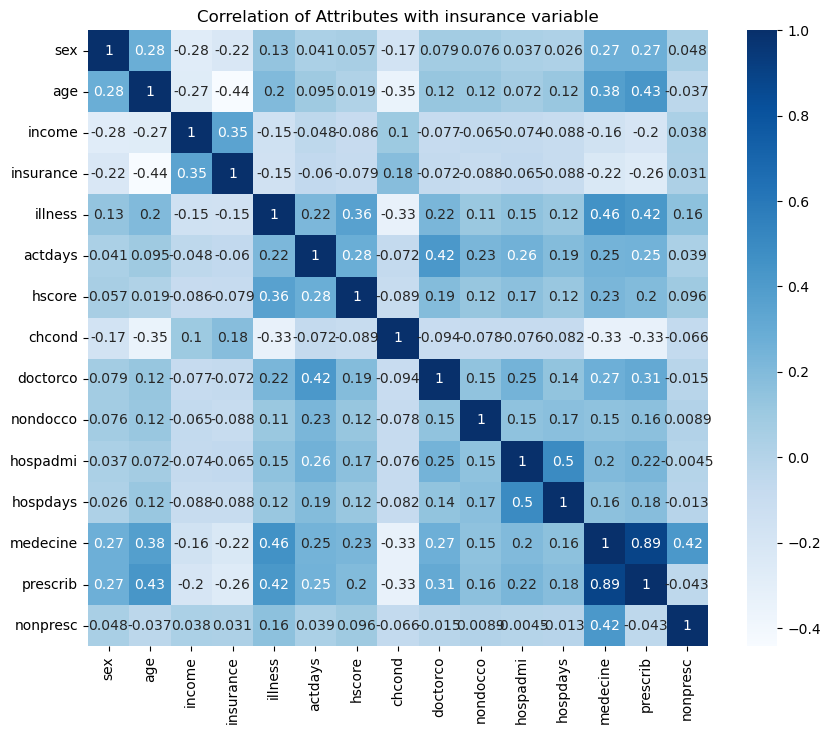

In [22]:
#Correlation Heat Map
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with insurance variable')
sns.heatmap(correlation,annot=True,cmap='Blues')

# Declare feature vector and target variable

In [23]:
X=df[['sex', 'age', 'income', 'illness', 'actdays', 'hscore',
       'chcond', 'doctorco', 'nondocco', 'hospadmi', 'hospdays', 'medecine',
       'prescrib', 'nonpresc']]
y=df['insurance']

In [24]:
X.shape

(5190, 14)

In [25]:
y.shape

(5190,)

# splitting data 

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=0)

In [27]:
X_train

,sex,age,income,illness,actdays,hscore,chcond,doctorco,nondocco,hospadmi,hospdays,medecine,prescrib,nonpresc
369,1,0.27,0.75,0,0,2,2,1,0,0,0,0,0,0
621,0,0.57,0.65,1,12,0,2,1,0,1,11,0,0,0
622,1,0.57,0.25,0,0,0,2,1,0,0,0,2,2,0
1650,0,0.27,1.30,1,2,1,1,0,0,0,0,3,1,2
4772,1,0.32,0.90,2,0,0,2,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4932,1,0.47,1.50,0,0,0,2,0,0,0,0,0,0,0
3265,0,0.32,1.50,0,0,0,0,0,0,0,0,0,0,0
1654,1,0.27,0.90,5,0,1,0,0,0,0,0,4,3,1
2608,0,0.72,0.25,3,3,1,0,0,0,0,0,1,0,1


In [28]:
cols = X_train.columns
cols

Index(['sex', 'age', 'income', 'illness', 'actdays', 'hscore', 'chcond',
       'doctorco', 'nondocco', 'hospadmi', 'hospdays', 'medecine', 'prescrib',
       'nonpresc'],
      dtype='object')

In [29]:
#scaling data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [30]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [31]:
X_train

,sex,age,income,illness,actdays,hscore,chcond,doctorco,nondocco,hospadmi,hospdays,medecine,prescrib,nonpresc
0,0.953989,-0.679793,0.464876,-1.028584,-0.301898,0.346670,0.987459,0.886794,-0.220213,-0.342235,-0.214484,-0.788083,-0.611762,-0.503572
1,-1.048230,0.779173,0.194098,-0.308020,3.780466,-0.570629,0.987459,0.886794,-0.220213,1.631322,1.569371,-0.788083,-0.611762,-0.503572
2,0.953989,0.779173,-0.889012,-1.028584,-0.301898,-0.570629,0.987459,0.886794,-0.220213,-0.342235,-0.214484,0.497262,0.795794,-0.503572
3,-1.048230,-0.679793,1.954153,-0.308020,0.378496,-0.111980,-0.082141,-0.381601,-0.220213,-0.342235,-0.214484,1.139934,0.092016,2.317516
4,0.953989,-0.436632,0.871043,0.412544,-0.301898,-0.570629,0.987459,-0.381601,-0.220213,-0.342235,-0.214484,-0.145411,-0.611762,0.906972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3628,0.953989,0.292851,2.495709,-1.028584,-0.301898,-0.570629,0.987459,-0.381601,-0.220213,-0.342235,-0.214484,-0.788083,-0.611762,-0.503572
3629,-1.048230,-0.436632,2.495709,-1.028584,-0.301898,-0.570629,-1.151742,-0.381601,-0.220213,-0.342235,-0.214484,-0.788083,-0.611762,-0.503572
3630,0.953989,-0.679793,0.871043,2.574236,-0.301898,-0.111980,-1.151742,-0.381601,-0.220213,-0.342235,-0.214484,1.782607,1.499572,0.906972
3631,-1.048230,1.508656,-0.889012,1.133108,0.718693,-0.111980,-1.151742,-0.381601,-0.220213,-0.342235,-0.214484,-0.145411,-0.611762,0.906972


In [32]:
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [33]:
import math
math.sqrt(len(y_test))

39.45883931389772

In [34]:
from sklearn.neighbors import KNeighborsClassifier
neighbors_values = [39, 204, 205, 206]

for n in neighbors_values:
    classifier = KNeighborsClassifier(n_neighbors=n, p=4, metric='euclidean')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    # Evaluate the model (e.g., accuracy, other metrics)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for n_neighbors={n}: {accuracy}")


Accuracy for n_neighbors=39: 0.565189466923571
Accuracy for n_neighbors=204: 0.5767501605651895
Accuracy for n_neighbors=205: 0.5773924213230571
Accuracy for n_neighbors=206: 0.5761078998073218


The maximum accuracy I can achieve is when n_neighbors is set to 205, with an accuracy of 0.58.

# Evaluating

In [35]:
y_pred=classifier.predict(X_test)

In [36]:
print('Accuracy {: .2f}%'.format(100*accuracy_score(y_pred,y_test)))

Accuracy  57.61%


In [37]:
print(confusion_matrix(y_test,y_pred))

[[  0   2  25  42]
 [  0 267  42  12]
 [  0 130 379 161]
 [  0  15 231 251]]


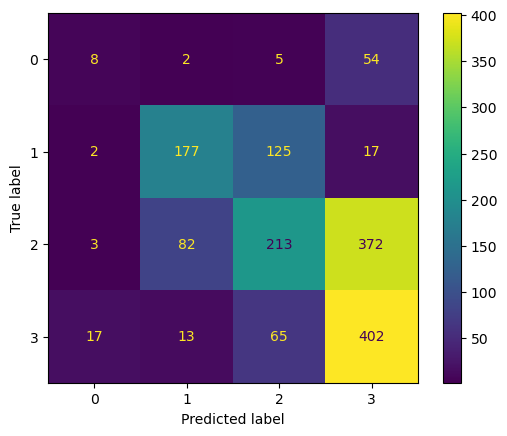

In [38]:
plot_confusion_matrix(model,X_test,y_test)

In [39]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.83      0.64      0.73       414
           2       0.57      0.56      0.56       677
           3       0.51      0.54      0.52       466

    accuracy                           0.58      1557
   macro avg       0.48      0.44      0.45      1557
weighted avg       0.62      0.58      0.59      1557



# Conclusion